In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats


In [18]:
# Parameter values for prior and analytic posterior
n = 100
h = 61

alpha = 10
beta = 10

alpha_post = 22
beta_post = 52
iterations=10000

In [25]:
with pymc3.Model() as model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", ahtmllpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=h)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

logp = -3.6866, ||grad|| = 11: 100%|██████████| 6/6 [00:00<00:00, 1142.45it/s]
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]
Sampling 2 chains: 100%|██████████| 201000/201000 [00:33<00:00, 6055.31draws/s]
The number of effective samples is smaller than 25% for some parameters.


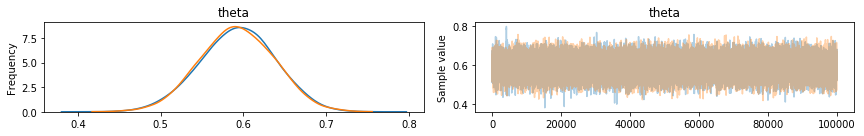

In [27]:
pymc3.traceplot(trace)
plt.show()

The code is taken from https://www.quantstart.com/articles/Markov-Chain-Monte-Carlo-for-Bayesian-Inference-The-Metropolis-Algorithm